<a href="https://colab.research.google.com/github/spttleonardo/RL_FranchiseRest_and_PriceHouse/blob/main/RL_FranchiseRest_and_PriceHouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este Coolab refere-se à aplicação do algoritmo de regressão linear ao problema de previsão do lucro de uma franquia de restaurante com base no tamanho da cidade. O segundo objetivo consiste na aplicação do mesmo algoritmo para prever o preço de uma casa de acordo com seu tamanho e quantidade de quartos.

Entre os métodos desenvolvidos, destacam-se a utilização da descida do gradiente e do método dos mínimos quadrados.


**REGRESSÃO LINEAR COM UMA VARIAVEL**

Aplicando o algoritimo de Regressão Linear para um Franquia de Restaurante

In [ ]:
# Realizando import de modulos
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

In [ ]:
# função para plotar um matriz identidade com o tamanho desejado se caso necessário
def warmUpExercise(tamanho):
    A = np.eye(tamanho)
    return A

In [ ]:
warmUpExercise(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [ ]:
# Inicializando os dados
data = np.loadtxt('/content/sample_data/ex1data1.txt', delimiter=',')

X,y = data[:,0], data[:,1]
m = y.size

df = pd.DataFrame(data)

print(df.head())

        0        1
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


In [ ]:
Xtrain, Ytrain = np.expand_dims(X, axis=1), np.expand_dims(y, axis=1) # Mdando a dimensão de 1d para 2d

In [ ]:
# Função Responsável por plotar os dados do data1
def plotData(x,y):

    fig = plt.figure()# open new figure

    plt.plot(x, y, 'ro', ms=10, mec ='k')
    plt.ylabel('Profit in $ 10.000')
    plt.xlabel('Population of CIty in 10,000s')

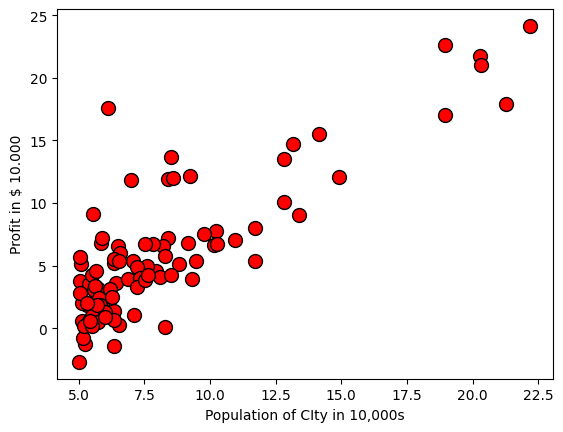

In [ ]:
plotData(X,y)

In [ ]:
# Função para encontrar o minimo da função custo
def computeCost(X, Y, theta):

    # Tamanho dos dados
    m = np.size(Y)

    # Adicionando coluna de 1 para o theta0
    a = np.ones((m, 1))
    Xin = X.copy()
    Xin = np.hstack((a,Xin))

    thetain = theta.copy()
    thetain = thetain.reshape(-1,1) # transformando 1d para 2d (1 linha para duas colunas)

    L2 = 0

    # Realizando cálculo do Loss
    hx = Xin @ thetain

    L2 = np.sum(np.square(hx-Y))/(2.0*m)

    return L2


In [ ]:
#Realizando testes na função para calcular o custo
J = computeCost(Xtrain, Ytrain, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)
print('Expected cost value (approximately) 32.07\n')

J = computeCost(Xtrain, Ytrain, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)
print('Expected cost value (approximately) 54.24')

With theta = [0, 0] 
Cost computed = 32.07
Expected cost value (approximately) 32.07

With theta = [-1, 2]
Cost computed = 54.24
Expected cost value (approximately) 54.24


In [ ]:
# Função para o cálculo da descida do gradiente
def gradientDescent(X,y,theta, alpha, num_iters):

    # Tamanho dos dados
    m = y.size

    # Adicionando coluna de 1 para o theta0
    Xin = X.copy()
    a = np.ones((m, 1))
    Xin = np.hstack((a,Xin))

    thetain = theta.copy()
    thetain = thetain.reshape(-1,1) # transformando 1d para 2d (1 linha para duas colunas)


    J_history = []
    theta0_history = [] # Para salvar o valor de  theta0 em cada iteração
    theta1_history = [] # Para salvar o valor de  theta1 em cada iteração

    # Laço de Repetição para o cálculo da descida do gradiente
    for i in range(num_iters):

        h = np.dot(Xin, thetain)
        erro = h - y
        gradiente = np.dot(Xin.T, erro)
        thetain = thetain - (alpha/m)*gradiente

        aux1 = thetain.flatten()
        theta0_history.append(aux1[0])
        theta1_history.append(aux1[1])
        J_history.append(computeCost(X, y, np.array([thetain[0],thetain[1]])))

    return thetain, theta0_history, theta1_history, J_history

In [ ]:
theta = np.zeros(2) # definindo o valor de zero para theta1 e theta2
iterations = 1500 # numero de epocas
alpha = 0.01 # learning rate

theta, theta0_history, theta1_history, L2_history = gradientDescent(Xtrain,Ytrain, theta, alpha, iterations)

print('Theta computed from the gradient descent: {:s}'.format(str(theta)));
print('Expected theta values (approximately):  [-3.6303, 1.1664]')
print('Mean Squared Error for training data computed from obtained Thetas: {:s}'.format(str(computeCost(Xtrain, Ytrain, theta))));


Theta computed from the gradient descent: [[-3.63029144]
 [ 1.16636235]]
Expected theta values (approximately):  [-3.6303, 1.1664]
Mean Squared Error for training data computed from obtained Thetas: 4.483388256587726


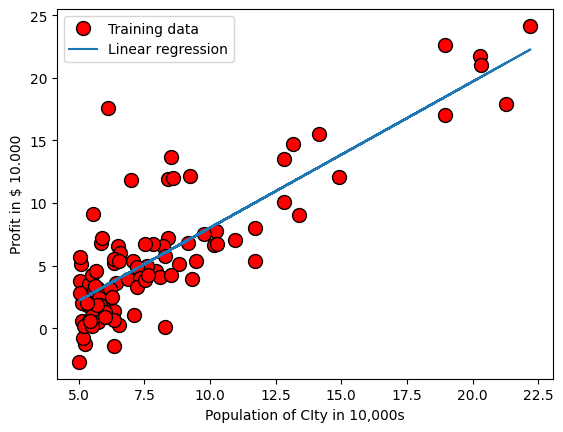

In [ ]:
# Realizando o plot da reta com abse no Xin e Ytrain

m = y.size
a = np.ones((m, 1))
Xin = Xtrain.copy()
Xin = np.hstack((a,Xin))

plotData(Xin[:,1],Ytrain)
plt.plot(Xin[:,1], np.dot(Xin,theta), '-')
plt.legend(['Training data', 'Linear regression']);

Text(0, 0.5, 'Custo (L2)')

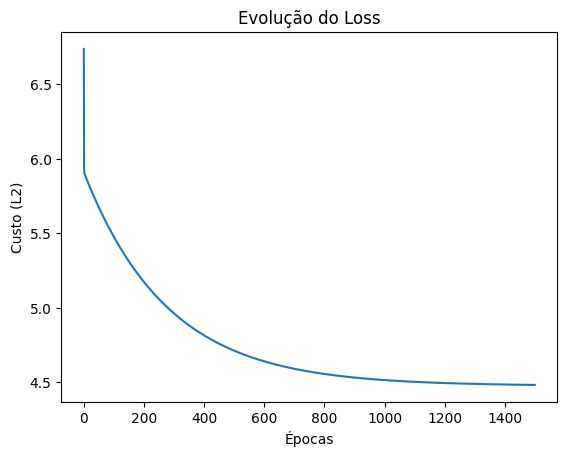

In [ ]:
# Plotando o grafico que representa a quantidade de epocas necessarias
plt.plot(L2_history)
plt.title('Evolução do Loss')
plt.xlabel('Épocas')
plt.ylabel('Custo (L2)')

In [ ]:
# Prevendo o valor do lucro com base em um população de 35,000 e 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:s}'.format(str(predict1 * 10000)))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:s}\n'.format(str(predict2*10000)))

For population = 35,000, we predict a profit of [4519.7678677]
For population = 70,000, we predict a profit of [45342.45012945]



In [ ]:
# Função para plotar a superficie da função
def plotL2surface(X,y, theta0_vals, theta1_vals):


  L2_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

  # Obtendo os valores de  J_vals
  for i, theta0 in enumerate(theta0_vals):
       for j, theta1 in enumerate(theta1_vals):
                 L2_vals[i, j] = computeCost(X, y, np.array([theta0, theta1]))

  L2_vals = L2_vals.T

  plt.contour(theta0_vals, theta1_vals, L2_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
  plt.xlabel('theta0')
  plt.ylabel('theta1')
  plt.title('L2 Surface Contour')
  pass

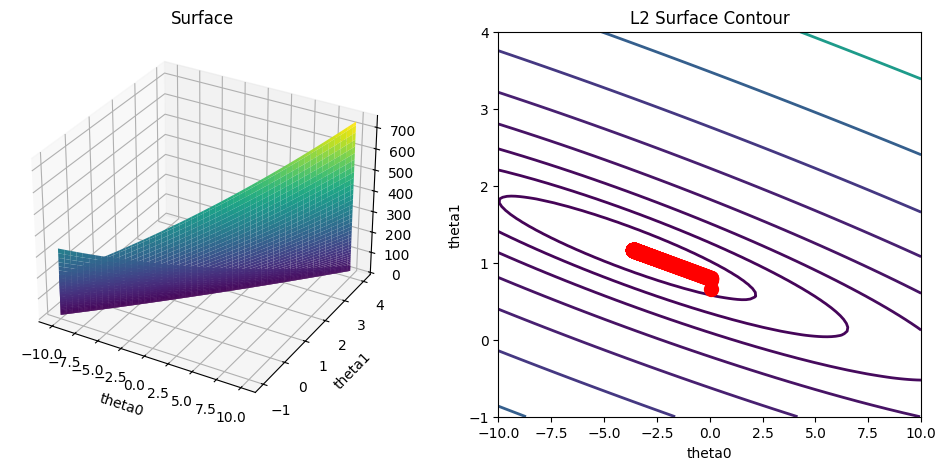

In [ ]:
# defindo valores para theta 0 e 1
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# Inicializando J para o calculo do Loss
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Encontrando valores de J
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(Xtrain, Ytrain, theta= np.array([theta0, theta1]))

#Devido à forma como as meshgrids funcionam no comando surf, precisamos transpor J_vals
#antes de chamar o surf, caso contrário, os eixos serão invertidos.
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.title('Surface')

# Plotando o valor de J até o ponto de minimo
ax = plt.subplot(122)
plotL2surface(Xtrain,Ytrain,theta0_vals, theta1_vals)
for i in range(len(theta0_history)):
  plt.plot(theta0_history[i],theta1_history[i],'ro', ms=10, lw=2)


REGRESSÃO LINEAR COM MULTIVARIAVEIS

Aplicando o algoritimo de Regressão Linear para prever o preço de um casa

In [ ]:
# Carregando dados
data = np.loadtxt('/content/sample_data/ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.T.size

print('{:>8s}{:>8s}{:>10s}'.format('X[:,0]', 'X[:, 1]', 'y'))
print('-'*26)
for i in range(10):
    print('{:8.0f}{:8.0f}{:10.0f}'.format(X[i, 0], X[i, 1], y[i]))

  X[:,0] X[:, 1]         y
--------------------------
    2104       3    399900
    1600       3    329900
    2400       3    369000
    1416       2    232000
    3000       4    539900
    1985       4    299900
    1534       3    314900
    1427       3    198999
    1380       3    212000
    1494       3    242500


In [ ]:
Xtrain, Ytrain = np.expand_dims(X, axis=1), np.expand_dims(y, axis=1) # mudando a dimensão de 1d para 2d

In [ ]:
# Função para plotar os dados
def plotData2(x,y):

    fig = plt.figure()# open new figure

    plt.plot(x, y, 'ro', ms=10, mec ='k')
    plt.ylabel('Price $ ')
    plt.xlabel('Size ')

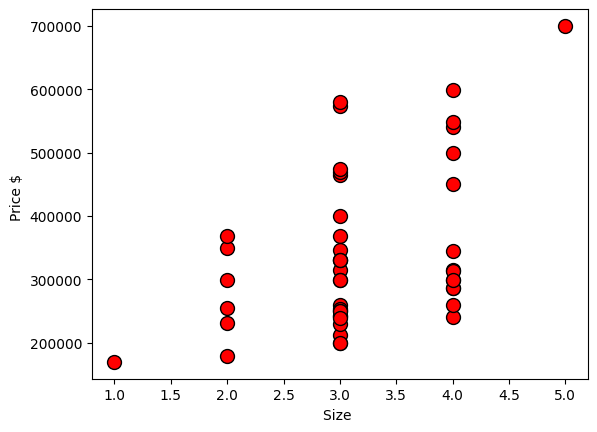

In [ ]:
plotData2(X[:,1], y)

In [ ]:
# Função para normalizar os dados de entrada
def featureNormalize(X):

    X_norm = X.copy()  # Copiar X para evitar modificar os dados originais
    mu = np.mean(X, axis=0)  # Média ao longo das colunas
    sigma = np.std(X, axis=0)  # Desvio padrão ao longo das colunas

    # Normalizando cada característica
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [ ]:
X_norm, mu, sigma = featureNormalize(X)
print('[mu] [sigma]')
print(mu, sigma)
print(X_norm)

[mu] [sigma]
[2000.68085106    3.17021277] [7.86202619e+02 7.52842809e-01]
[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-

In [ ]:
X_norm = np.concatenate((np.ones((m, 1)), X_norm), axis=1) # adicionando o vetor coluna de 1 devido ao theta 0

In [ ]:
# Função para encontra o Loss no caso multivariavel
def computeCostMulti(X, y, theta):

    m = y.size
    J = 0

    h = np.dot(X, theta)
    sq_error = np.sum(np.square(h - y))
    J = (sq_error) / (2 * m)

    return J

In [ ]:
# Função para o cálculo do gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):

    J_history = []
    m = y.size  # Numero de exemplos

    for i in range(num_iters):

        h = np.dot(X, theta)
        theta = theta - ((alpha / m) * (np.dot(X.T, (h - y))))
        J_history.append(computeCostMulti(X, y, theta))


    return theta, J_history

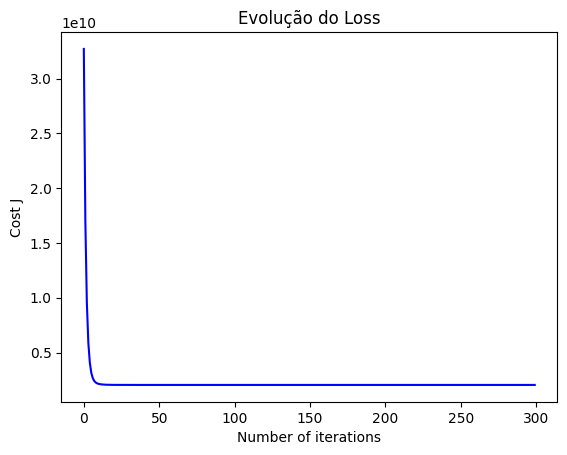

In [ ]:
# Iniciando treinamento do modelo
alpha = 0.3
num_iters = 300

theta = np.zeros(3)
theta, J_history = gradientDescentMulti(X_norm, y, theta, alpha, num_iters)

# Plot the convergence graph
plt.plot(J_history, '-b')
plt.title('Evolução do Loss')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()


In [ ]:
# Realizando previsão do novo preço de uma casa
house = np.array([1650, 3])
house_norm = (house - mu) / sigma
house_norm = np.concatenate(([1], house_norm))  # Adicionar bias (1)
price = house_norm.dot(theta)

print("O preço de casa é" , price)

O preço de casa é 293081.46433489607


NORMAL EQUATIONS

Utilizando o método dos minimos quadrados para realizar a comparação entre resultados

In [ ]:
# Carregando os dados
data = np.loadtxt('/content/sample_data/ex1data2.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]
m = y.size
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [ ]:
# Função para obter os valores de theta
def normalEqn(X, y):

    theta = np.zeros(X.shape[1])

    Xin = X.copy()
    Yin = y.copy()

    theta = np.linalg.inv(Xin.T@Xin)@Xin.T@Yin

    return theta

In [ ]:
# Calculando os valores de theta
theta = normalEqn(X, y);

print('Theta computed from the normal equations: {:s}'.format(str(theta)));

# Estimando o preço para um casa de tamanho 1650 sq-ft, e 3 quartos

price = np.array([1,1650,3]).dot(theta)


print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:.0f}'.format(price))

Theta computed from the normal equations: [89597.9095428    139.21067402 -8738.01911233]
Predicted price of a 1650 sq-ft, 3 br house (using normal equations): $293081
